# Expectation value of an observable

In all good books on quantum mechanics (sucha s Griffiths and Schröeter) we learn how to compute the expectation value of an observable in a given state. But how is this expectation value measured experimentally?

The best way to understand this is no doubt to do an experiment and then measure the expectation value of an observable. The quantum computer is the ideal experiment for this so let's use it!

**Learning goal:** Understand how to obtain the expectation value from an experiment.

In [1]:
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
import numpy as np

# Loading your IBM Q account(s)
provider = IBMQ.load_account()

**How do we measure an expectation value in an experiment?**

The first thing to realize is that when we measure a physical observable in quantum mechanics we do not nessesarely get the same answer each time! This is true even though we very carefully make sure that the system is always in exactly the same state before we make the measurement. Therefore if we repeat the exact same measurement $N$ times, we will get a collection of $N$ results. **The expectation value** is the average value of these results when $N$ is large.  

**How we use the qubits here:**


Throughout this exercise we will identify the two states of a qubit with the two states of a spin 1/2 system: the qubit state $|0\rangle$ is identified with the spin state $|s,m\rangle=|1/2,-1/2\rangle\equiv|\downarrow\rangle$ and likevise we identify $|1\rangle$ with $|s,m\rangle=|1/2,1/2\rangle=|\uparrow\rangle$. When we measure the qubit and find '0' ('1') the intrepretaion therefore is that we have measured $S_z$ and found the value $-\hbar/2$ ($\hbar/2$).


**Our experiment:**

We will compute the expectation value of $S_z$ in the state 

\begin{equation}
|\psi\rangle = \frac{1}{\sqrt{2}}\big(|\uparrow\rangle +|\downarrow\rangle\big)
\end{equation}

**Exercise 1:** Compute the propability that the measurement of $S_z$ gives respectively $-\hbar/2$ and $\hbar/2$.


Now let's do the experiment 10 times and have alook at the results!

**Don't miss:** Each time we start the system in the $|\psi\rangle$ and then measure $S_z$. 

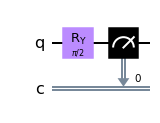

In [2]:
from math import pi
circ = QuantumCircuit(1,1)
circ.ry(pi/2,0)
circ.measure(0,0)
circ.draw()

In [42]:
simulator = Aer.get_backend('aer_simulator')

result = simulator.run(circ, shots=10, memory=True).result()
memory = result.get_memory(circ)

ints = [eval(x)-1/2 for x in memory]
print("Measurements of $S_z$ in units of hbar:", ints)

Measurements of $S_z$ in units of hbar: [0.5, 0.5, -0.5, -0.5, 0.5, 0.5, 0.5, -0.5, 0.5, -0.5]


**Check 1:** Does the result you just obtained look consistent with the results just obtained?

**Exercise 2:** Compute the expectation value of $S_z$ in the state $|\psi\rangle$. 

**Note:** We often use the notation $\langle S_z\rangle$ to denote the expectation value of the operator $S_z$. Note, however, that the expectation value depends on the operator and the state, $|\psi\rangle$, we compute the expectation value in! We really should write $\langle S_z\rangle$ as $\langle \psi|S_z|\psi\rangle$. 

**Don't miss:** The expectation value depends on the operator **and** the state.

**Check 2:** To check your prediction let's repeat the experiment 10.000 times.

In [3]:
simulator = Aer.get_backend('aer_simulator')

experiments = 10000
result = simulator.run(circ, shots=experiments, memory=True).result()
memory = result.get_memory(circ)


ints = [eval(x)-1/2 for x in memory]
y = sum(ints)
print("Expectationvalue of S_z",y/experiments,"hbar")

Expectationvalue of S_z -0.0007 hbar


**Note:** We have 'only' performed the experiment 10.000 times so the average value of our results will be close to but not exactly equal to the expectation value.

**Take home:** The expectation value of an operator, $O$, in a given state, $|\psi\rangle$, is the average value of the results we obtain when we (many times) start the system in the state $|\psi\rangle$ and then measure $O$. 